In [1]:
import numpy as np
import matplotlib as mpl
# mpl.use('Agg') #silent mode
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

file_name = "PDOS_Cr_SOC.dat"

In [2]:
#------------------ FONT_setup ----------------------
font = {'family' : 'arial', 
    'color'  : 'black',
    'weight' : 'normal',
    'size' : 13.0,
    }

In [3]:
#------------------- Data Read ----------------------
with open(file_name,"r") as reader:
	legend = reader.readline()
legends=legend.split()[1:]
legends=[i.replace("_"," ") for i in legends]
# legend_s=tuple(legends)
datas=np.loadtxt(file_name,dtype=np.float64,skiprows=1)

In [6]:
def pdos_plot(start,index):
    #--------------------- PLOTs ------------------------
    axe = plt.subplot(3,2,index)
    # Color methods! choose only one of the two methods
    axe.plot(datas[:,0],datas[:,start+1:start+2],linewidth=1.0) #auto colors

    axe.set_xlabel(r'${E}$-$E_{f}$ (eV)',fontdict=font)
    axe.set_ylabel(r'PDOS (states/eV)',fontdict=font)
    plt.yticks(fontsize=font['size']-2,fontname=font['family'])
    legend_s = tuple(legends[start:start+1])
    plt.legend(legend_s,loc='best')
    plt.xlim(( -20,20)) # set y limits manually
    plt.ylim(0,1.8) # set y limits manually
    leg = plt.gca().get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=font['size']) 
    fig = plt.gcf()
    fig.set_size_inches( 5, 5)

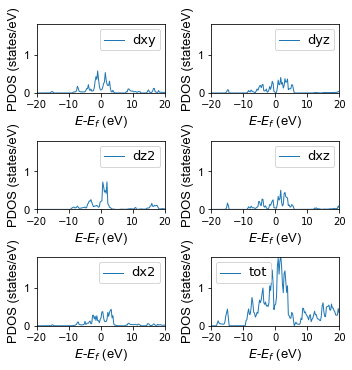

In [7]:
for i in range(4,10):
    index=range(4,10).index(i)
    pdos_plot(i,index+1)
plt.tight_layout()
plt.savefig('Cr_dos.png',dpi= 200)